In [1]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score


##Testing the model (calculating the scores)

Here we are going to use a portion of the original dataset to evaluate the model. This data was not included on the reduced dataset used before, therefore it was not used as training or test data.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BERT_data/AI_Human.csv')

In [ ]:
df_tail = df.tail(2000)
df_tail

,text,generated
485235,The face that you seem to see on Mars is just ...,0.0
485236,Schools assign summer projects to students wit...,1.0
485237,"As a teenage student, I believe that curfews a...",1.0
485238,Cell Phones\n\nWe humans have Are cell phones ...,0.0
485239,Imagination and knowledge are two essential co...,1.0
...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0
487231,The whole purpose of democracy is to create a ...,0.0
487232,I firmly believe that governments worldwide sh...,1.0
487233,I DFN't agree with this decision because a LFT...,0.0


Number of observations in each category (for validation data)

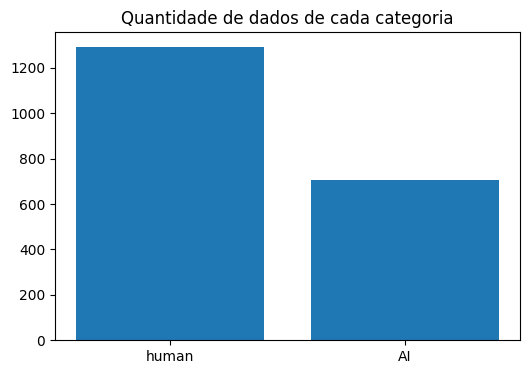

In [ ]:
quant_dados = pd.DataFrame(df_tail['generated'].value_counts()).reset_index()
plt.figure(figsize=(6,4))
plt.title('Number of observations in each category (for validation data)')
plt.bar(quant_dados['generated'], quant_dados['count'])
plt.xticks(quant_dados['generated'], ['human', 'AI'])
plt.show()

In [ ]:
model = BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/BERT_data/my_model_model')

In [ ]:
tokenizer = BertTokenizer.from_pretrained('/content/drive/MyDrive/BERT_data/my_model_2')

In [ ]:
#making the predictions for validation data
predicoes = []

for text in df_tail['text']:
  inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt')#.to('cuda')
  outputs = model(**inputs)
  predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
  predictions = predictions.cpu().detach().numpy()

  i = 1
  pred = predictions.astype(list)
  if(pred[0][0] > pred[0][1]):
    i = 0
  predicoes.append(i)


[0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,


In [ ]:
df_tail['predicoes'] = predicoes

<ipython-input-37-3d137faae3ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tail['predicoes'] = predicoes


In [ ]:
#now the validation dataset has the text, the original label and the prediction label
df_tail.head()

,text,generated,predicoes
485235,The face that you seem to see on Mars is just ...,0.0,0
485236,Schools assign summer projects to students wit...,1.0,1
485237,"As a teenage student, I believe that curfews a...",1.0,1
485238,Cell Phones\n\nWe humans have Are cell phones ...,0.0,0
485239,Imagination and knowledge are two essential co...,1.0,1


In [ ]:
type(df_tail['generated'][485239])

numpy.float64

Scores from validation:

In [ ]:
print('Accuracy:', '%.4f'%accuracy_score(df_tail['generated'], df_tail['predicoes']))
print('F1 score:', '%.4f'%f1_score(df_tail['generated'], df_tail['predicoes']))
print('Precision:', '%.4f'%precision_score(df_tail['generated'], df_tail['predicoes']))
print('Recall:', '%.4f'%recall_score(df_tail['generated'], df_tail['predicoes']))

A acurácia é: 0.9890
O F1 score é: 0.9847
A precisão é: 0.9712
O recall é: 0.9986


In [ ]:
df_tail.to_csv('/content/drive/MyDrive/BERT_data/df_predicoes')

##Testing the model (example)

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
#exemplo com texto gerado por IA (classe 1)
text = """I firmly believe that governments worldwide should take immediate action to address the pressing issue of climate change, as the consequences of inaction with be catastrophic for the planet and future generations. There are several competing reasons that support my position.

Firstly, climate change poses a significant threat to our natural environment. The earth's temperature is rising at an alarming rate, resulting in meeting ice caps, rising sea Levels, and an increase in extreme weather events such as hurricanes, droughts, and heatwaves. These environmental changes have a devastating impact on ecosystems, resulting in the Loss of biodiversity, habitat destruction, and species extinction. For example, the Great Barrier Reef, one of the most biodiverse ecosystems on the planet, has seen a significant decline in recent years due to coral bleaching caused by warming ocean temperatures.

Secondly, the negative impacts of climate change extend beyond environmental concerns, affecting human health and economic growth. As the planet warms, the spread of diseases and pests with increase, Leading to more frequent outbreaks of illnesses such as malaria and dengue fever. Additionally, the economic costs associated with climate change, including damage to infrastructure, Loss of productivity, and declining tourism, with be staggering. In fact, a recent report by the Intergovernmental Panel on Climate Change (IPCC) estimated that the global cost of failing to act on climate change could exceed $54 trillion by the end of this century.

Finally, taking action to address climate change presents an opportunity for governments to invest in renewable energy sources, creating new jobs, spurring economic growth, and reducing our dependence on fossil fuels. For example, countries Like Germany, Denmark, and China have seen significant economic benefits from their investments in wind, solar, and other clean technologies.

In conclusion, the evidence is clear that immediate action must be taken by governments worldwide to address the urgent threat of climate change. Failure to act now with result in irreparable damage to our planet and future generations' wellbeing. We must work together to reduce greenhouse gas emissions, protect our natural environment, and invest in a sustainable, clean energy future. The time for action is now, and we cannot afford to wait any Longer."""


inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt')#.to('cuda')
outputs = model(**inputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions = predictions.cpu().detach().numpy()
print(predictions)

pred = predictions.astype(list)
if(pred[0][0] > pred[0][1]):
  print("The text was written by a human")
else:
  print("The text was AI generated")

[[0.00000681 0.9999932 ]]
O texto foi gerado por IA


In [ ]:
#exemplo com texto escrito por humano (classe 0)
text = """The whole purpose of democracy is to create a government that reflects the desires, opinions, ANJ attitudes of the people being governed, but how can this be achieve if the people aren't fairly represented during election time, presidential or otherwise? This is the problem with the Electoral College system; it puts all of decision-making power in the hands of our electors, not the citizens themselves. To begin with, the electors selected by citizens are capable of defying the will of the people they were chosen to represent. Next, in the case of a tie, the opinions of millions of people would be overlooked. Finally, because the Electoral College encourages candidates to focus on obtaining votes instead informing all voters about their intentions, only the influential "swing" states receive enough attention from candidates to make a well-formed decision when voting. When it comes to something as serious as the fate of our country, citizens cannot put their faith in the such a corrupt system as the Electoral College.

First, the Electoral College system creates a window of opportunity for "faithless" electors to take advantage of the power given to them by society during the voting process. Under the Electoral College, voters Jo not vote directly for whom they want as president, but instead for a slate of electors, who in turn select the president. Although these electors may pledge themselves to a particular candidate, there is no way to determine whether they end up casting their vote according to the will of the people who put them in charge. Such an unpredictable turn of events could be avoided if only the outcomes of presidential elections were determine by popular vote, not through an Electoral College.

Secondly, if a tie were to occur, the opinions of countless citizens would be ignored. In this case, the election would be thrown to the House of Representatives, were delegates from each state would vote on the president. Since each state has only one vote to cast, a vote from a state containing 500,000 people would carry the same weight as a vote representing the opinions of 35 million. Given that many voters vote one party for president ANJ another for Congress, the selection made by the House of Representatives can hardly be expected to represent the will of the people."""

inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt')#.to('cuda')
outputs = model(**inputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions = predictions.cpu().detach().numpy()
print(predictions)

pred = predictions.astype(list)
if(pred[0][0] > pred[0][1]):
  print("The text was written by a human")
else:
  print("The text was AI generated")

[[0.99990356 0.00009647]]
O texto foi escrito por um humano
